In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as pyplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
import pandas as pd

df = pd.read_csv('flight_data_fe.csv')

df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,2008,1,3,4,1047.0,1030,1328.0,1320,157,101.0,...,False,True,False,False,False,False,False,False,False,False
1,2008,1,3,4,2232.0,2115,108.0,5,632,96.0,...,False,True,False,False,False,False,False,False,False,False
2,2008,1,3,4,1512.0,1315,1802.0,1610,706,110.0,...,False,True,False,False,False,False,False,False,False,False
3,2008,1,3,4,2025.0,1955,2301.0,2245,908,96.0,...,False,True,False,False,False,False,False,False,False,False
4,2008,1,3,4,1439.0,1425,1720.0,1720,1582,101.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,2008,12,13,6,1455.0,1400,2013.0,1935,1032,198.0,...,True,False,False,False,False,False,False,False,False,False
149566,2008,12,13,6,1357.0,1350,1638.0,1612,1049,341.0,...,False,False,False,False,False,False,False,False,False,True
149567,2008,12,13,6,955.0,948,1655.0,1635,1080,240.0,...,True,False,False,False,False,False,False,False,False,False
149568,2008,12,13,6,1354.0,1330,2104.0,2018,1088,250.0,...,True,False,False,False,False,False,False,False,False,False


In [3]:
df = df.astype('float64')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,2008.0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008.0,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008.0,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008.0,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008.0,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,2008.0,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,2008.0,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,2008.0,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,2008.0,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
count,149570.0,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,...,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000,149570.000000
mean,2008.0,6.177656,15.767948,3.984489,1501.171057,1454.707448,1615.830400,1647.969994,1297.682811,165.638417,...,0.081300,0.086093,0.098863,0.097299,0.070402,0.097292,0.124758,0.136551,0.090212,0.117229
std,0.0,3.447459,8.788079,2.000986,459.719401,430.097762,562.237334,469.904555,1213.978055,74.679213,...,0.273296,0.280503,0.298480,0.296365,0.255824,0.296356,0.330445,0.343374,0.286486,0.321695
min,2008.0,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1153.000000,1126.000000,1324.000000,1340.000000,486.000000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1533.000000,1500.000000,1726.000000,1720.000000,1080.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1852.000000,1810.000000,2039.000000,2021.000000,1667.000000,214.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,7820.000000,619.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               149570 non-null  float64
 1   Month              149570 non-null  float64
 2   DayofMonth         149570 non-null  float64
 3   DayOfWeek          149570 non-null  float64
 4   DepTime            149570 non-null  float64
 5   CRSDepTime         149570 non-null  float64
 6   ArrTime            149570 non-null  float64
 7   CRSArrTime         149570 non-null  float64
 8   FlightNum          149570 non-null  float64
 9   ActualElapsedTime  149570 non-null  float64
 10  CRSElapsedTime     149570 non-null  float64
 11  AirTime            149570 non-null  float64
 12  ArrDelay           149570 non-null  float64
 13  DepDelay           149570 non-null  float64
 14  Distance           149570 non-null  float64
 15  TaxiIn             149570 non-null  float64
 16  Ta

In [6]:
df.drop(['Year'], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.drop(['DepDelay'], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop(['ArrDelay'], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.drop(['TaxiIn'], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 51 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              149570 non-null  float64
 1   DayofMonth         149570 non-null  float64
 2   DayOfWeek          149570 non-null  float64
 3   DepTime            149570 non-null  float64
 4   CRSDepTime         149570 non-null  float64
 5   ArrTime            149570 non-null  float64
 6   CRSArrTime         149570 non-null  float64
 7   FlightNum          149570 non-null  float64
 8   ActualElapsedTime  149570 non-null  float64
 9   CRSElapsedTime     149570 non-null  float64
 10  AirTime            149570 non-null  float64
 11  Distance           149570 non-null  float64
 12  TaxiOut            149570 non-null  float64
 13  Cancelled          149570 non-null  float64
 14  Diverted           149570 non-null  float64
 15  CarrierDelay       149570 non-null  float64
 16  We

In [11]:
df.drop(['TaxiOut'], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
Month,1.000000,0.041088,-0.001580,-0.014119,-0.023292,-0.003217,-0.009129,-0.014055,0.016078,0.026936,...,0.014921,-0.004381,-0.021663,0.020617,0.008531,-0.003444,0.006491,-0.023442,-0.008767,0.014800
DayofMonth,0.041088,1.000000,0.011949,-0.002256,-0.004931,-0.001236,-0.005933,-0.000577,-0.000089,0.000992,...,0.001283,-0.004171,0.004056,0.000416,0.005173,-0.001228,-0.002988,-0.006356,0.000715,0.004635
DayOfWeek,-0.001580,0.011949,1.000000,0.016383,0.024277,0.008412,0.011747,0.001250,-0.010611,-0.007828,...,-0.000200,0.005464,-0.011179,-0.014355,-0.012155,0.019694,0.007093,-0.008828,0.006896,0.006522
DepTime,-0.014119,-0.002256,0.016383,1.000000,0.848696,0.412289,0.687765,0.018679,-0.039404,-0.035633,...,-0.063704,0.008396,-0.021448,-0.004669,-0.048348,0.049238,0.048754,-0.031503,0.028292,0.022439
CRSDepTime,-0.023292,-0.004931,0.024277,0.848696,1.000000,0.328680,0.643730,0.004850,-0.029519,-0.017035,...,-0.050153,0.001231,-0.036112,-0.007037,-0.062388,0.052323,0.057585,-0.028265,0.037812,0.020279
ArrTime,-0.003217,-0.001236,0.008412,0.412289,0.328680,1.000000,0.605885,-0.013283,0.016747,0.020631,...,-0.000899,-0.000239,0.007635,-0.033833,0.004583,-0.002603,0.013387,0.013216,0.005996,-0.009388
CRSArrTime,-0.009129,-0.005933,0.011747,0.687765,0.643730,0.605885,1.000000,-0.015607,0.069921,0.080546,...,-0.007309,-0.012924,0.020889,0.014804,0.003271,-0.006304,0.009203,-0.017386,-0.003069,-0.000498
FlightNum,-0.014055,-0.000577,0.001250,0.018679,0.004850,-0.013283,-0.015607,1.000000,-0.247541,-0.260080,...,-0.007269,-0.009378,0.068917,-0.079550,-0.052616,-0.017133,0.057952,0.013887,0.050267,-0.037795
ActualElapsedTime,0.016078,-0.000089,-0.010611,-0.039404,-0.029519,0.016747,0.069921,-0.247541,1.000000,0.966529,...,-0.024870,-0.086864,-0.083235,0.143522,-0.000610,-0.057753,0.089420,-0.002067,-0.060072,0.059418
CRSElapsedTime,0.026936,0.000992,-0.007828,-0.035633,-0.017035,0.020631,0.080546,-0.260080,0.966529,1.000000,...,-0.030566,-0.085076,-0.085846,0.160378,0.000944,-0.061724,0.091540,-0.009787,-0.058100,0.056319


In [13]:
df['Delay'] = df['TotalDelay'].apply(lambda x: 1.0 if x > 0 else 0.0)

In [14]:
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,Delay
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
df.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,Delay
Month,1.000000,0.041088,-0.001580,-0.014119,-0.023292,-0.003217,-0.009129,-0.014055,0.016078,0.026936,...,-0.004381,-0.021663,0.020617,0.008531,-0.003444,0.006491,-0.023442,-0.008767,0.014800,-0.027864
DayofMonth,0.041088,1.000000,0.011949,-0.002256,-0.004931,-0.001236,-0.005933,-0.000577,-0.000089,0.000992,...,-0.004171,0.004056,0.000416,0.005173,-0.001228,-0.002988,-0.006356,0.000715,0.004635,0.002194
DayOfWeek,-0.001580,0.011949,1.000000,0.016383,0.024277,0.008412,0.011747,0.001250,-0.010611,-0.007828,...,0.005464,-0.011179,-0.014355,-0.012155,0.019694,0.007093,-0.008828,0.006896,0.006522,-0.002897
DepTime,-0.014119,-0.002256,0.016383,1.000000,0.848696,0.412289,0.687765,0.018679,-0.039404,-0.035633,...,0.008396,-0.021448,-0.004669,-0.048348,0.049238,0.048754,-0.031503,0.028292,0.022439,0.033314
CRSDepTime,-0.023292,-0.004931,0.024277,0.848696,1.000000,0.328680,0.643730,0.004850,-0.029519,-0.017035,...,0.001231,-0.036112,-0.007037,-0.062388,0.052323,0.057585,-0.028265,0.037812,0.020279,0.012872
ArrTime,-0.003217,-0.001236,0.008412,0.412289,0.328680,1.000000,0.605885,-0.013283,0.016747,0.020631,...,-0.000239,0.007635,-0.033833,0.004583,-0.002603,0.013387,0.013216,0.005996,-0.009388,-0.006815
CRSArrTime,-0.009129,-0.005933,0.011747,0.687765,0.643730,0.605885,1.000000,-0.015607,0.069921,0.080546,...,-0.012924,0.020889,0.014804,0.003271,-0.006304,0.009203,-0.017386,-0.003069,-0.000498,-0.002164
FlightNum,-0.014055,-0.000577,0.001250,0.018679,0.004850,-0.013283,-0.015607,1.000000,-0.247541,-0.260080,...,-0.009378,0.068917,-0.079550,-0.052616,-0.017133,0.057952,0.013887,0.050267,-0.037795,0.030893
ActualElapsedTime,0.016078,-0.000089,-0.010611,-0.039404,-0.029519,0.016747,0.069921,-0.247541,1.000000,0.966529,...,-0.086864,-0.083235,0.143522,-0.000610,-0.057753,0.089420,-0.002067,-0.060072,0.059418,-0.041254
CRSElapsedTime,0.026936,0.000992,-0.007828,-0.035633,-0.017035,0.020631,0.080546,-0.260080,0.966529,1.000000,...,-0.085076,-0.085846,0.160378,0.000944,-0.061724,0.091540,-0.009787,-0.058100,0.056319,-0.098470


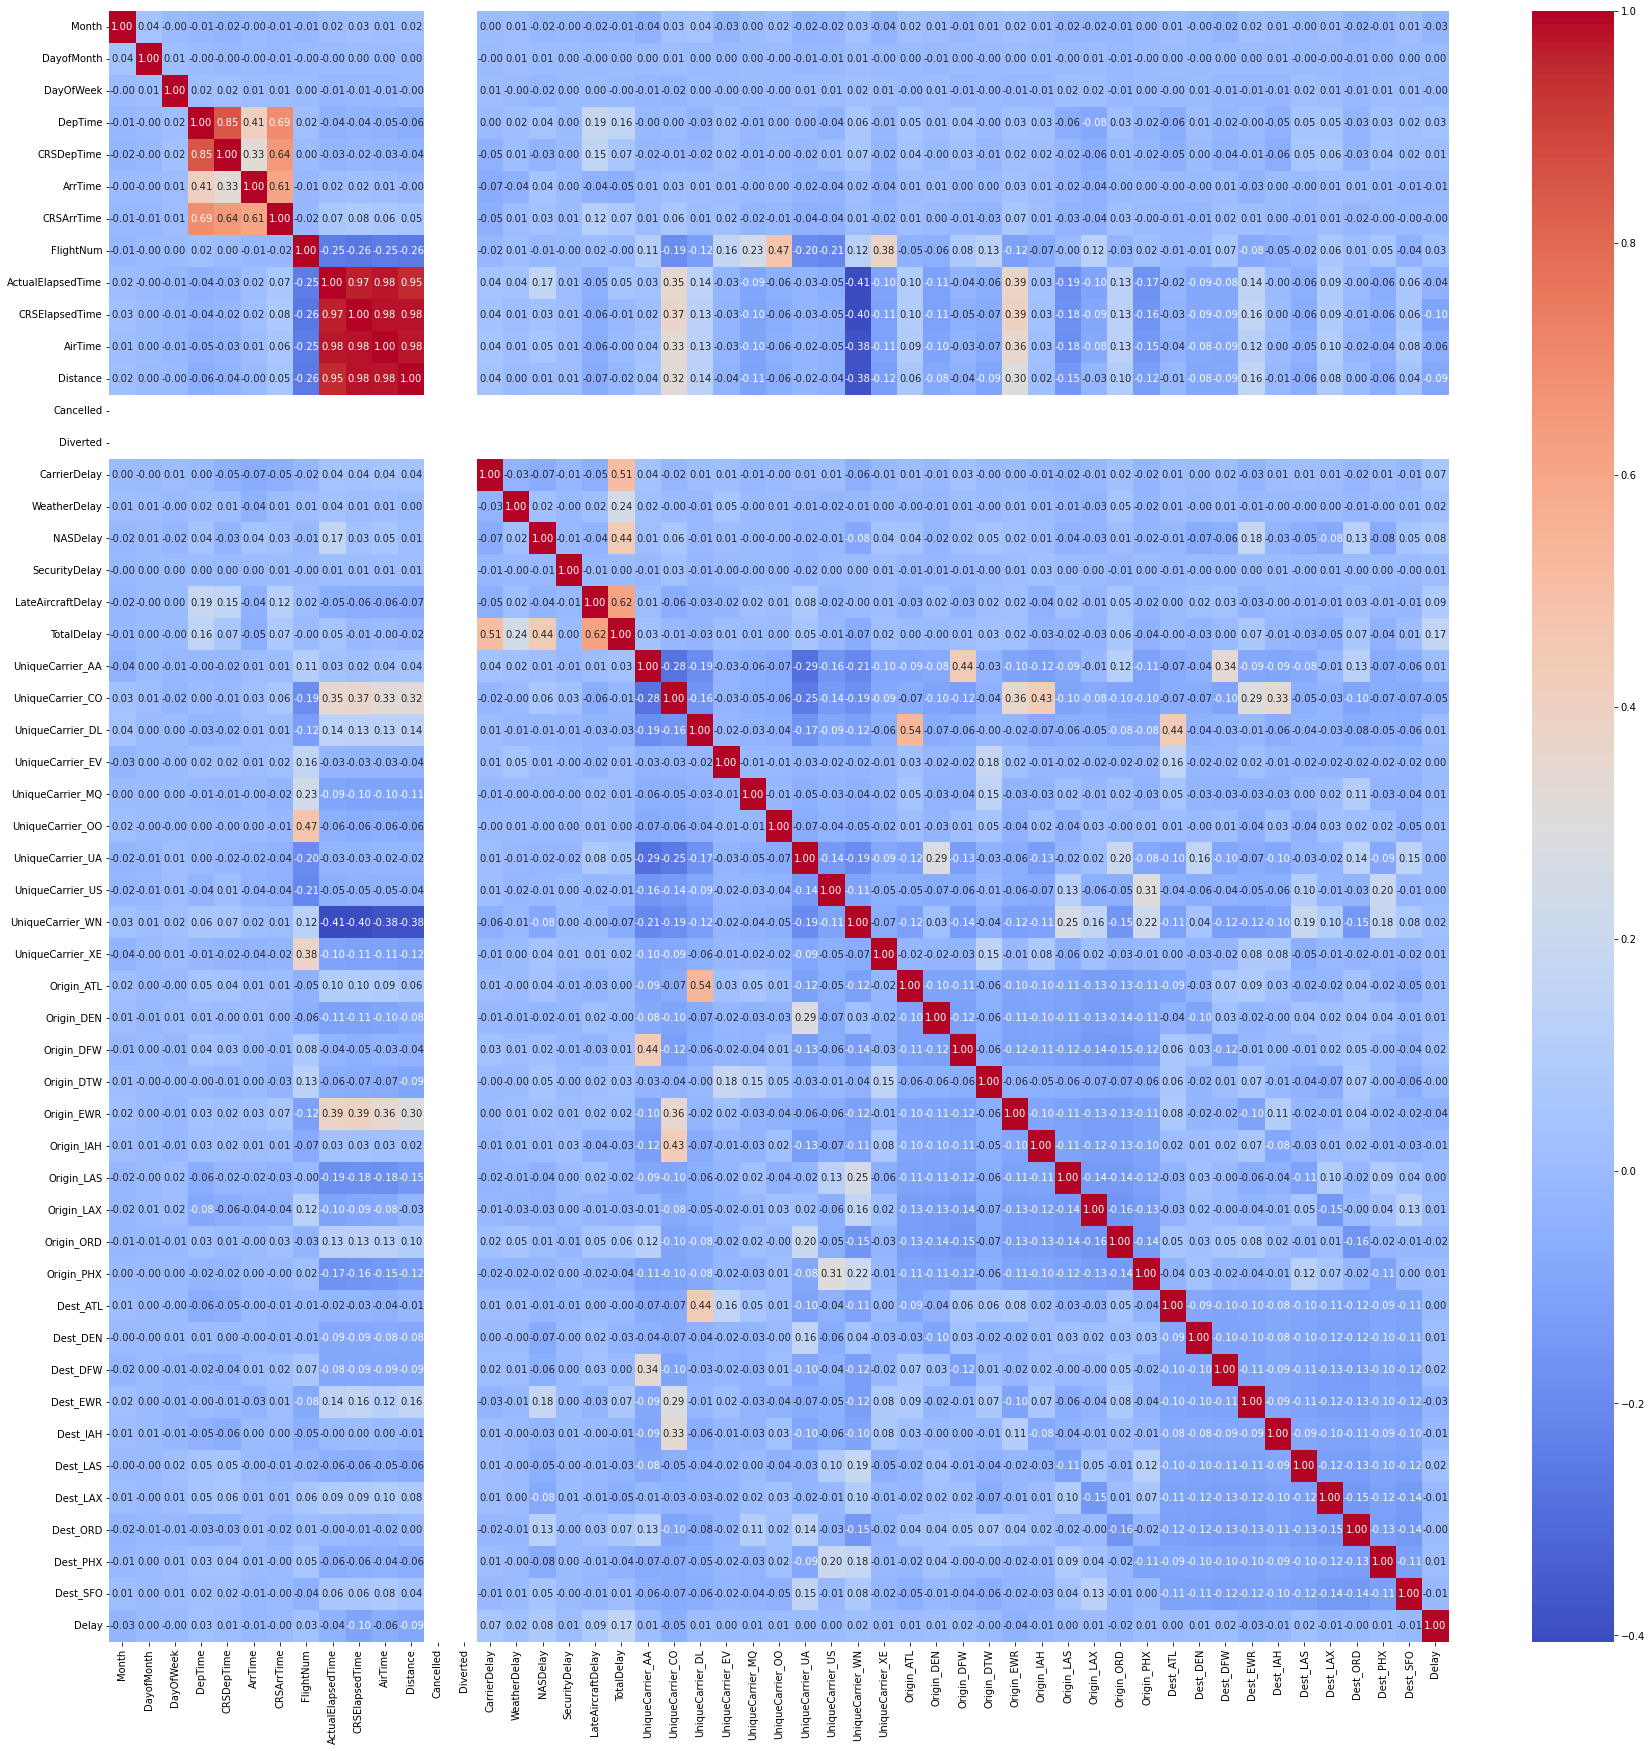

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 51 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              149570 non-null  float64
 1   DayofMonth         149570 non-null  float64
 2   DayOfWeek          149570 non-null  float64
 3   DepTime            149570 non-null  float64
 4   CRSDepTime         149570 non-null  float64
 5   ArrTime            149570 non-null  float64
 6   CRSArrTime         149570 non-null  float64
 7   FlightNum          149570 non-null  float64
 8   ActualElapsedTime  149570 non-null  float64
 9   CRSElapsedTime     149570 non-null  float64
 10  AirTime            149570 non-null  float64
 11  Distance           149570 non-null  float64
 12  Cancelled          149570 non-null  float64
 13  Diverted           149570 non-null  float64
 14  CarrierDelay       149570 non-null  float64
 15  WeatherDelay       149570 non-null  float64
 16  NA

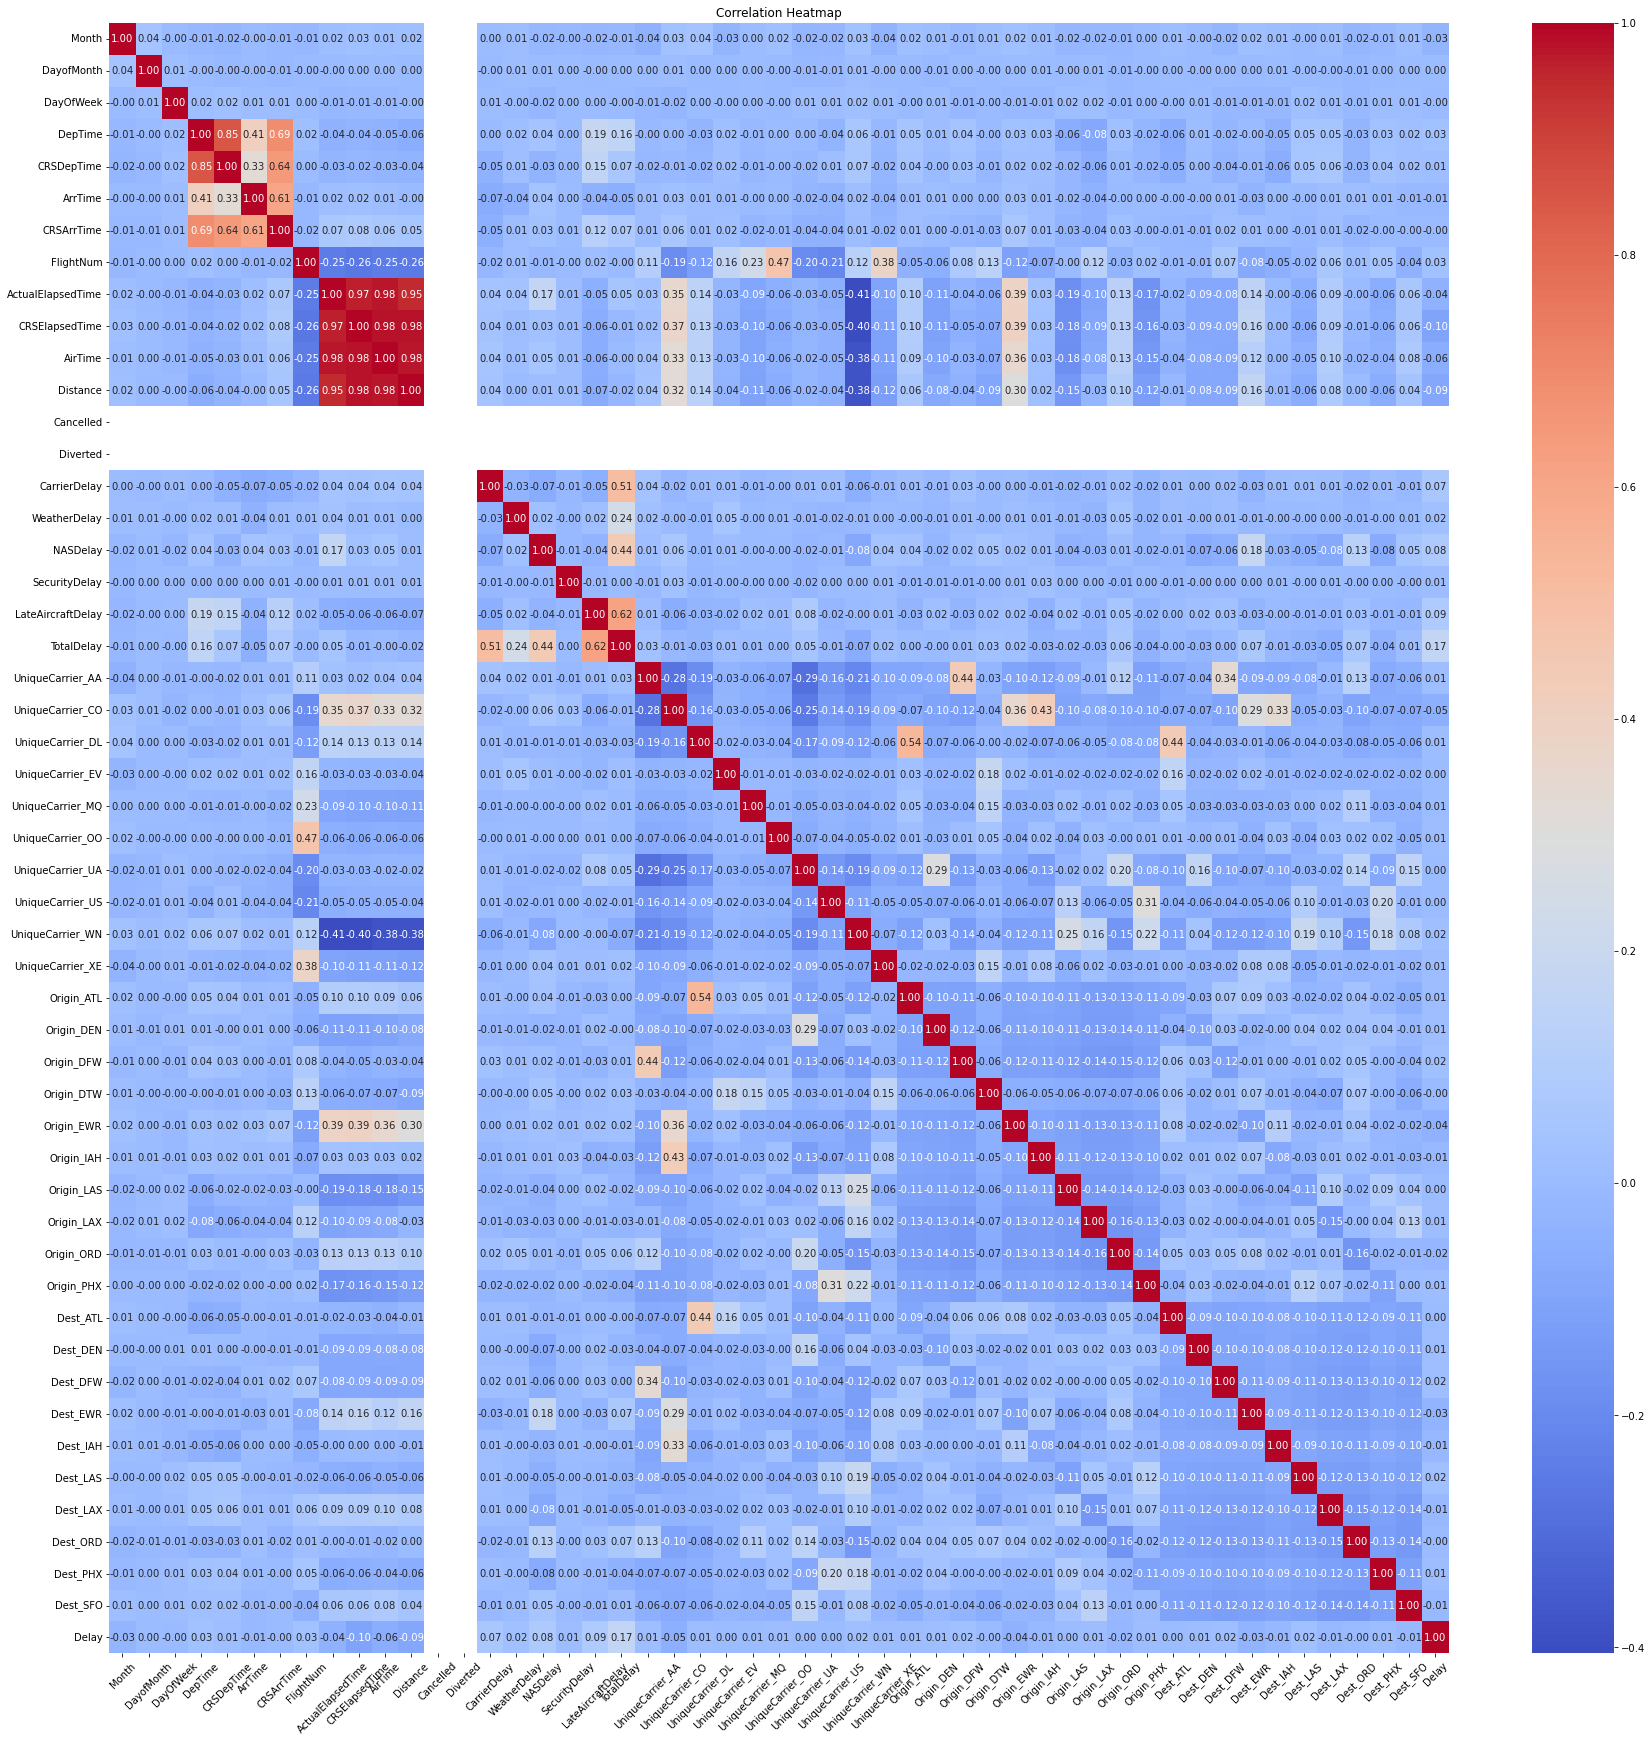

In [45]:
corr_matrix = df.corr()

plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)


plt.show()

In [46]:
Y = df['Delay'].to_numpy()

In [47]:
X = df.drop(columns=['Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TotalDelay'])
X

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,Delay
0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149565,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149566,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
149567,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149568,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df['Delay'].value_counts()

Delay
1.0    144181
0.0      5389
Name: count, dtype: int64